<h1>Конспект книги "Практическая статистика для специалистов Data Science"</h1>

https://github.com/gedeck/practical-statistics-for-data-scientists

In [1]:
!pip install numpy pandas matplotlib scipy statsmodels wquantiles seaborn

In [2]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

In [3]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

In [4]:
AIRLINE_STATS_CSV = DATA / 'airline_stats.csv'
KC_TAX_CSV = DATA / 'kc_tax.csv.gz'
LC_LOANS_CSV = DATA / 'lc_loans.csv'
AIRPORT_DELAYS_CSV = DATA / 'dfw_airline.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'
SP500_SECTORS_CSV = DATA / 'sp500_sectors.csv'
STATE_CSV = DATA / 'state.csv'

<h2>Оценки центрального положения</h2>

<h3>Пример: средние оценки числености населения и уровня убийств</h3>

In [5]:
# Table 1-2
state = pd.read_csv(STATE_CSV)
print(state.head(8))

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE


In [9]:
print(state['Population'].mean()) # среднее

6162876.3


In [8]:
print(trim_mean(state['Population'], 0.1)) # усеченное среднее 

4783697.125


In [10]:
print(state['Population'].median()) # медиана

4436369.5


In [11]:
print(np.average(state['Murder.Rate'], weights=state['Population'])) # взвешенное среднее 

4.445833981123393


In [12]:
print(wquantiles.median(state['Murder.Rate'], weights=state['Population'])) # взвешанная медиана 

4.4


<b>Ключевые идеи для оценок центрального положения</b>
<ul>
<li>Базовой метрикой централього положения является среднее, но оно может быть чувствительным к предельным значениям (выбросам)</li>
<li>Медиана, среднее усеченное являются более робасными</li>
</ul>

<h2>Оценки вариабельности</h2>

In [13]:
print(state['Population'].std()) # стандартное откланение 

6848235.347401142


In [14]:
print(state['Population'].quantile(0.75) - state['Population'].quantile(0.25)) # межквартильный размах IQR (interquartile range)

4847308.0


In [17]:
print(robust.scale.mad(state['Population'])) # медианное абсолютное отклонение от медианы MAD (mediane absolute deviation)

3849876.1459979336


<b>Ключевые идеи для оценок вариабельности</b>
<ul>
<li>Дисперсия и стандартное отклонение - наиболее широко распространенные и в рутинном порядке регистрируемые статистикиоценки вариабельности, обе они чувствительны к выбросам</li>
<li>Более робасные метрики - среднее абсолютное отклонение, медианное абсолютное отклонение от медианы MAD, и процентили (квантили) </li>
<li></li>
</ul>

<h2>Разведование распределения данных</h2>

In [20]:
print(state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])) # процентили

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64


<h4>Коробчатая диаграмма </h4>

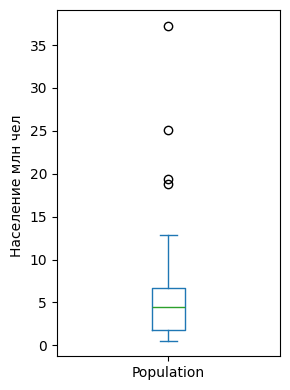

In [23]:
ax = (state['Population']/1_000_000).plot.box(figsize=(3, 4))
ax.set_ylabel('Население млн чел ')

plt.tight_layout()
plt.show()

<h4>Частотная таблица</h4>

In [28]:
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([state, binnedPopulation], axis=1)
df = df.sort_values(by='Population')

groups = []
for group, subset in df.groupby(by='binnedPopulation', observed=False):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'States': ','.join(subset.Abbreviation)
    })
print(pd.DataFrame(groups))

                   BinRange  Count  \
0    (526935.67, 4232659.0]     24   
1    (4232659.0, 7901692.0]     14   
2   (7901692.0, 11570725.0]      6   
3  (11570725.0, 15239758.0]      2   
4  (15239758.0, 18908791.0]      1   
5  (18908791.0, 22577824.0]      1   
6  (22577824.0, 26246857.0]      1   
7  (26246857.0, 29915890.0]      0   
8  (29915890.0, 33584923.0]      0   
9  (33584923.0, 37253956.0]      1   

                                              States  
0  WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N...  
1          KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA  
2                                  VA,NJ,NC,GA,MI,OH  
3                                              PA,IL  
4                                                 FL  
5                                                 NY  
6                                                 TX  
7                                                     
8                                                     
9                              

<h4>Гистограмма</h4>

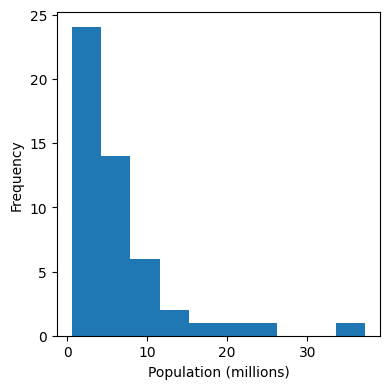

In [29]:
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')

plt.tight_layout()
plt.show()